In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split as tts

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

In [2]:
url= "https://raw.githubusercontent.com/kxerxess/Diabetes-Prediction/master/data/diabetes-DROP-COLUMNS.csv"
df = pd.read_csv(url)
df

,Unnamed: 0,Pregnancies,DiabetesPedigreeFunction,Age,Outcome
0,0,6,0.627,50,1
1,1,1,0.351,31,0
2,2,8,0.672,32,1
3,3,1,0.167,21,0
4,4,0,2.288,33,1
...,...,...,...,...,...
763,763,10,0.171,63,0
764,764,2,0.340,27,0
765,765,5,0.245,30,0
766,766,1,0.349,47,1


In [3]:
df = df.drop(columns=['Unnamed: 0'])
df = df.drop(columns=['DiabetesPedigreeFunction'])
df

,Pregnancies,Age,Outcome
0,6,50,1
1,1,31,0
2,8,32,1
3,1,21,0
4,0,33,1
...,...,...,...
763,10,63,0
764,2,27,0
765,5,30,0
766,1,47,1


In [4]:
df.corr()

,Pregnancies,Age,Outcome
Pregnancies,1.000000,0.544341,0.221898
Age,0.544341,1.000000,0.238356
Outcome,0.221898,0.238356,1.000000


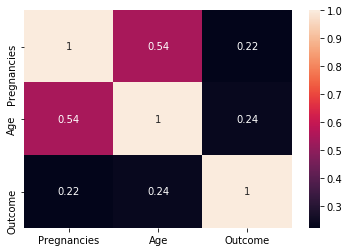

In [5]:
sb.heatmap(df.corr(), annot=True)

In [6]:
labels = df.loc[:,'Outcome'].values
features = df.loc[:,df.columns!='Outcome'].values
print(labels[labels==1].shape[0], labels[labels==0].shape[0])

268 500


In [7]:
scaler=MinMaxScaler((0,1))
x=scaler.fit_transform(features)
y=labels

In [8]:
xTrain,xTest,yTrain,yTest=tts(x, y, test_size=0.2, random_state=69)

In [9]:
clf=LogisticRegression()
clf.fit(xTrain, yTrain)
pred=clf.predict(xTest)
print(classification_report(yTest,pred))

              precision    recall  f1-score   support

           0       0.67      0.88      0.76        99
           1       0.50      0.22      0.30        55

    accuracy                           0.64       154
   macro avg       0.58      0.55      0.53       154
weighted avg       0.61      0.64      0.60       154



In [10]:
clf=RandomForestClassifier()
clf.fit(xTrain, yTrain)
pred=clf.predict(xTest)
print(classification_report(yTest,pred))

              precision    recall  f1-score   support

           0       0.70      0.84      0.76        99
           1       0.54      0.35      0.42        55

    accuracy                           0.66       154
   macro avg       0.62      0.59      0.59       154
weighted avg       0.64      0.66      0.64       154



In [11]:
clf=SVC()
clf.fit(xTrain, yTrain)
pred=clf.predict(xTest)
print(classification_report(yTest,pred))

              precision    recall  f1-score   support

           0       0.72      0.85      0.78        99
           1       0.59      0.40      0.48        55

    accuracy                           0.69       154
   macro avg       0.66      0.62      0.63       154
weighted avg       0.67      0.69      0.67       154



In [12]:
clf=KNeighborsClassifier()
clf.fit(xTrain, yTrain)
pred=clf.predict(xTest)
print(classification_report(yTest,pred))

              precision    recall  f1-score   support

           0       0.72      0.79      0.75        99
           1       0.54      0.45      0.50        55

    accuracy                           0.67       154
   macro avg       0.63      0.62      0.62       154
weighted avg       0.66      0.67      0.66       154



In [13]:
dtree=DecisionTreeClassifier(criterion='entropy', max_depth=8)
clf = dtree.fit(xTrain, yTrain)
pred=clf.predict(xTest)
print(classification_report(yTest,pred))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76        99
           1       0.57      0.51      0.54        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.68      0.69      0.68       154



In [14]:
clf=BaggingClassifier()
clf.fit(xTrain, yTrain)
pred=clf.predict(xTest)
print(classification_report(yTest,pred))

              precision    recall  f1-score   support

           0       0.69      0.80      0.74        99
           1       0.49      0.35      0.40        55

    accuracy                           0.64       154
   macro avg       0.59      0.57      0.57       154
weighted avg       0.62      0.64      0.62       154

